In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analysis Functions

In [3]:
def analyze_cue_time_diff(df):
    df['mix_cue_time_diff'] = df['mix_cue_out_time'] - df['mix_cue_in_time']
    df['track_cue_time_diff'] = df['track_cue_out_time'] - df['track_cue_in_time']
    df['cue_time_diff_diff'] = df['mix_cue_time_diff'] - df['track_cue_time_diff']

    print("Mix Cue Time Differences:")
    print(df['mix_cue_time_diff'].head())
    print("Mean:", df['mix_cue_time_diff'].mean())
    print("Median:", df['mix_cue_time_diff'].median())
    print("Standard Deviation:", df['mix_cue_time_diff'].std())
    print("Min:", df['mix_cue_time_diff'].min())
    print("Max:", df['mix_cue_time_diff'].max())
    print()

    print("Track Cue Time Differences:")
    print(df['track_cue_time_diff'].head())
    print("Mean:", df['track_cue_time_diff'].mean())
    print("Median:", df['track_cue_time_diff'].median())
    print("Standard Deviation:", df['track_cue_time_diff'].std())
    print("Min:", df['track_cue_time_diff'].min())
    print("Max:", df['track_cue_time_diff'].max())
    print()

    print("Difference between Mix and Track Cue Time Differences:")
    print(df['cue_time_diff_diff'].head())
    print("Mean:", df['cue_time_diff_diff'].mean())
    print("Median:", df['cue_time_diff_diff'].median())
    print("Standard Deviation:", df['cue_time_diff_diff'].std())
    print("Min:", df['cue_time_diff_diff'].min())
    print("Max:", df['cue_time_diff_diff'].max())
    print()

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[0].hist(df['mix_cue_time_diff'], bins=50)
    axs[0].set_title('Mix Cue Time Differences')
    axs[0].set_xlabel('Time Difference (s)')
    axs[0].set_ylabel('Frequency')

    axs[1].hist(df['track_cue_time_diff'], bins=50)
    axs[1].set_title('Track Cue Time Differences')
    axs[1].set_xlabel('Time Difference (s)')
    axs[1].set_ylabel('Frequency')

    axs[2].hist(df['cue_time_diff_diff'], bins=50)
    axs[2].set_title('Difference between Mix and Track Cue Time Differences')
    axs[2].set_xlabel('Time Difference (s)')
    axs[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [4]:
def analyze_key_changes(df):
    rows_with_key_changes = df[df['key_change'] > 0].shape[0]
    print(f"Number of tracks with key changes: {rows_with_key_changes}")
    
    bins = np.arange(0, 12.5) # Create bins for 0 to 12
    plt.hist(df['key_change'], bins=bins, align='left')
    plt.xlabel('Number of Key Changes')
    plt.ylabel('Frequency')
    plt.title('Histogram of Key Changes')
    plt.show()

In [5]:
def check_cue_time_order(df):
    correct = True
    for i in range(df.shape[0]):
        if df.iloc[i]['mix_cue_out_time'] <= df.iloc[i]['mix_cue_in_time']:
            print(f"Error: mix_cue_out_time is not after mix_cue_in_time for track {df.iloc[i]['track_id']}")
            correct = False
        if i > 0 and df.iloc[i]['mix_cue_in_time'] <= df.iloc[i-1]['mix_cue_out_time']:
            print(f"Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track {df.iloc[i]['track_id']}")
            correct = False
    if correct:
        print("All mix_cue_in_time and mix_cue_out_time are in order.")

In [80]:
def analyze_transition_gaps(df):
    df['time_transition_gap'] = df['mix_cue_in_time'] - df['mix_cue_out_time'].shift(1)
    df['beat_transition_gap'] = df['mix_cue_in_beat'] - df['mix_cue_out_beat'].shift(1)
    df_transition_gaps = df[1:]
    
    print("Summary statistics of transition gaps in TIME domain:")
    print(df_transition_gaps['time_transition_gap'].describe())
    print()

    print("Summary statistics of transition gaps in BEAT domain:")
    print(df_transition_gaps['beat_transition_gap'].describe())
    print()
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(df_transition_gaps['time_transition_gap'], bins=50)
    axs[0].set_xlabel('Transition Gap (seconds)')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Histogram of Transition Gaps (Time Domain)')
    
    axs[1].hist(df_transition_gaps['beat_transition_gap'], bins=50)
    axs[1].set_xlabel('Transition Gap (beats)')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of Transition Gaps (Beat Domain)')
    
    # Add vertical lines at 32, 64, 96, 128 beats
    for x in [32, 64, 96, 128]:
        axs[1].axvline(x, color='r', linestyle='--')
        axs[1].text(x, axs[1].get_ylim()[1]*0.9, f'{x}', ha='center', va='center')
    
    plt.tight_layout()
    plt.show()

# MFCC Pkl

In [81]:
df_mfcc = pd.read_pickle('../data/align/jwmtj61-mfcc.pkl')

In [82]:
df_mfcc.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,mfcc,False,0.783133,0,1.261869,[1.2618689655986173],"[[411, 358], [410, 358], [409, 358], [408, 358...",14.35,141.96,6.64,152.70,29,293,13,310
1,jwmtj61,16juffhx,mfcc,False,0.492228,0,1.569414,[1.5694135824021376],"[[384, 329], [383, 328], [382, 328], [381, 328...",122.67,158.39,133.18,168.81,252,328,284,360


Mix Cue Time Differences:
0    127.61
1     35.72
2     64.41
3     86.36
4     21.68
Name: mix_cue_time_diff, dtype: float64
Mean: 67.58310344827586
Median: 53.26000000000022
Standard Deviation: 45.84889935611855
Min: 11.7800000000002
Max: 173.99000000000024

Track Cue Time Differences:
0    146.06
1     35.63
2     64.70
3     87.66
4     23.39
Name: track_cue_time_diff, dtype: float64
Mean: 83.1296551724138
Median: 67.61
Standard Deviation: 52.83340538784953
Min: 10.909999999999997
Max: 232.9

Difference between Mix and Track Cue Time Differences:
0   -18.45
1     0.09
2    -0.29
3    -1.30
4    -1.71
Name: cue_time_diff_diff, dtype: float64
Mean: -15.546551724137924
Median: -0.719999999999942
Standard Deviation: 39.001613819710975
Min: -142.65999999999977
Max: 37.35000000000025



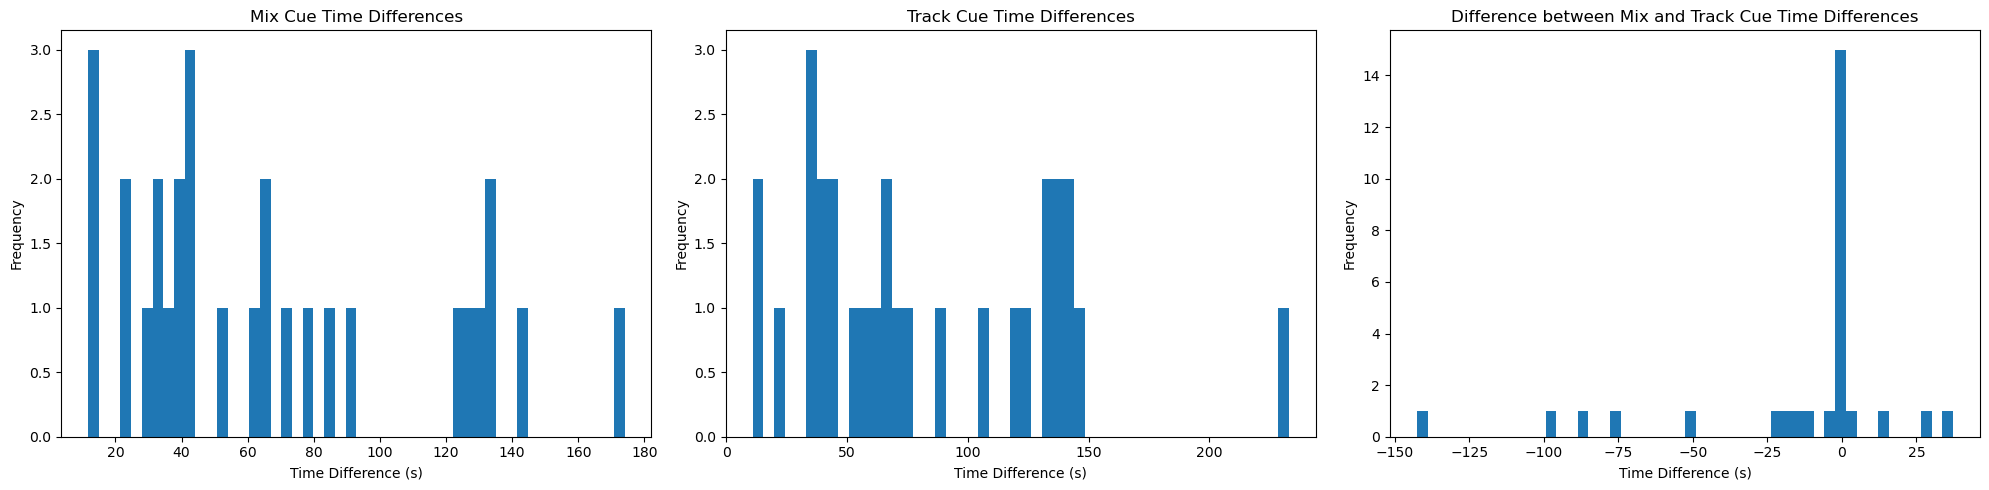

In [83]:
analyze_cue_time_diff(df_mfcc)

Number of tracks with key changes: 0


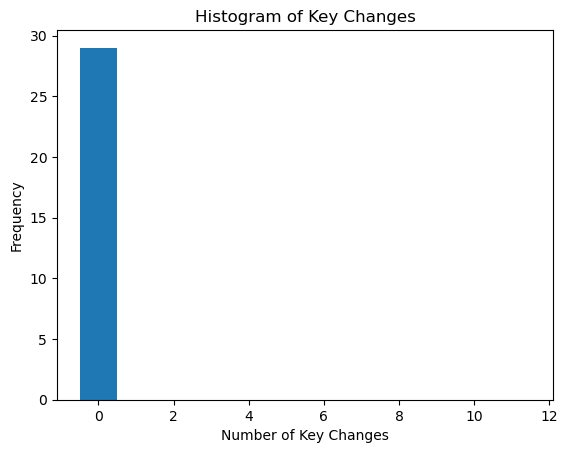

In [84]:
analyze_key_changes(df_mfcc)

In [85]:
check_cue_time_order(df_mfcc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1mlcb24f
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1s76shlf
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track mwv1cnx
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 2m76b78x
Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 1lnhf0jx


# Chroma Pkl

In [86]:
df_chroma = pd.read_pickle('../data/align/jwmtj61-chroma.pkl')

In [87]:
df_chroma.columns

Index(['mix_id', 'track_id', 'feature', 'key_invariant', 'match_rate',
       'key_change', 'best_cost', 'costs', 'wp', 'mix_cue_in_time',
       'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
       'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat',
       'track_cue_out_beat'],
      dtype='object')

Mix Cue Time Differences:
0    82.32
1    41.89
2    95.18
3    67.55
4    62.81
Name: mix_cue_time_diff, dtype: float64
Mean: 79.79448275862069
Median: 66.60999999999996
Standard Deviation: 39.30018643959841
Min: 7.869999999999891
Max: 173.62000000000012

Track Cue Time Differences:
0     82.62
1     41.72
2     95.61
3    128.44
4     67.33
Name: track_cue_time_diff, dtype: float64
Mean: 92.36586206896553
Median: 77.81
Standard Deviation: 50.36796370690695
Min: 7.969999999999999
Max: 224.52

Difference between Mix and Track Cue Time Differences:
0    -0.30
1     0.17
2    -0.43
3   -60.89
4    -4.52
Name: cue_time_diff_diff, dtype: float64
Mean: -12.571379310344826
Median: -0.4100000000000108
Standard Deviation: 34.15785767413845
Min: -120.14999999999989
Max: 26.580000000000098



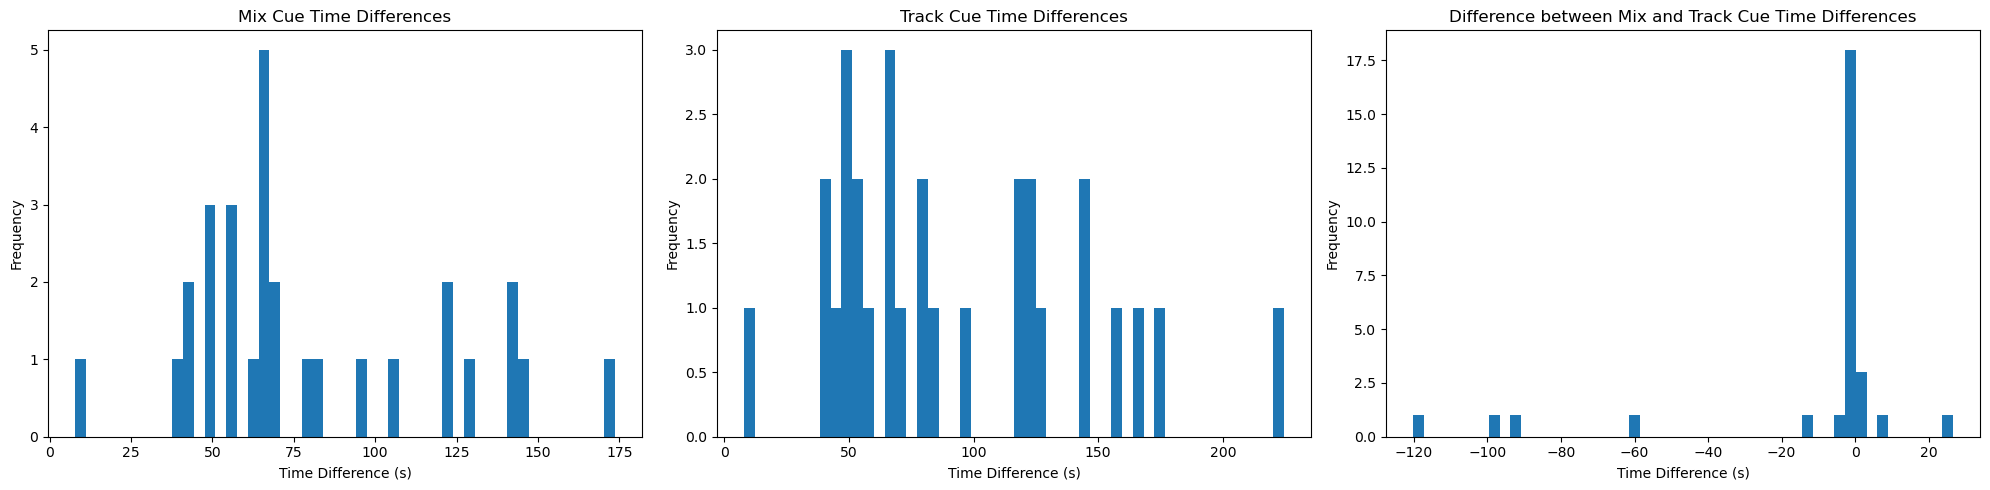

In [88]:
analyze_cue_time_diff(df_chroma)

Number of tracks with key changes: 0


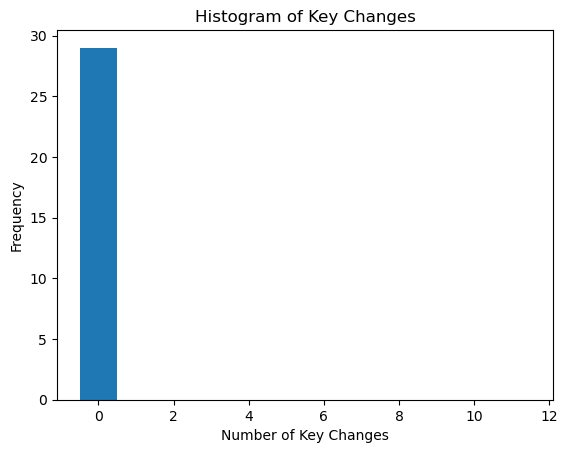

In [89]:
analyze_key_changes(df_chroma)

In [90]:
check_cue_time_order(df_chroma)

All mix_cue_in_time and mix_cue_out_time are in order.


Summary statistics of transition gaps in TIME domain:
count     28.000000
mean      41.524643
std       51.120417
min        4.780000
25%       16.750000
50%       22.700000
75%       38.007500
max      217.910000
Name: time_transition_gap, dtype: float64

Summary statistics of transition gaps in BEAT domain:
count     28.000000
mean      90.500000
std      110.964959
min       12.000000
25%       35.250000
50%       47.500000
75%       89.250000
max      465.000000
Name: beat_transition_gap, dtype: float64



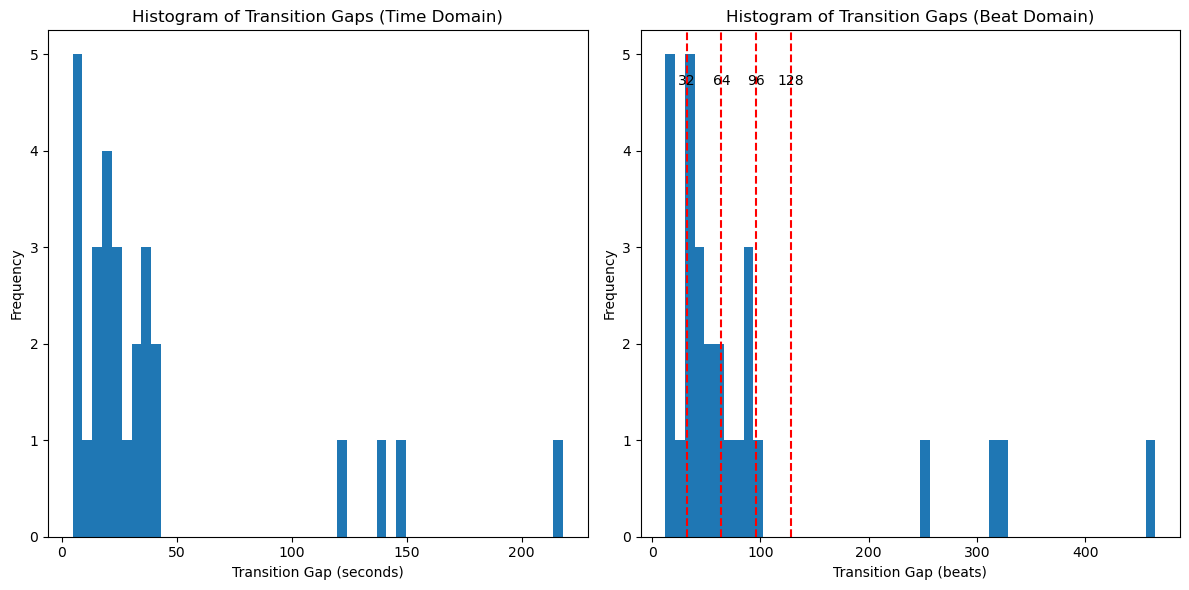

In [91]:
analyze_transition_gaps(df_chroma)

In [93]:
df_chroma[['track_id', 'match_rate', 'best_cost',
           'mix_cue_in_time', 'mix_cue_out_time', 'track_cue_in_time', 'track_cue_out_time',
           'mix_cue_in_beat', 'mix_cue_out_beat', 'track_cue_in_beat', 'track_cue_out_beat',
           'mix_cue_time_diff', 'track_cue_time_diff', 'cue_time_diff_diff',
           'time_transition_gap', 'beat_transition_gap']].head(8)

,track_id,match_rate,best_cost,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat,mix_cue_time_diff,track_cue_time_diff,cue_time_diff_diff,time_transition_gap,beat_transition_gap
0,12t6wktp,0.501217,1.665522,7.95,90.27,0.25,82.87,16,184,0,168,82.32,82.62,-0.30,NaN,NaN
1,16juffhx,0.335938,1.756937,108.99,150.88,14.58,56.30,223,312,31,120,41.89,41.72,0.17,18.72,39.0
2,258n7bkf,0.479393,1.766334,171.52,266.70,13.25,108.86,356,560,28,232,95.18,95.61,-0.43,20.64,44.0
3,10y0bwb5,0.414687,2.243411,275.51,343.06,50.36,178.80,579,725,107,381,67.55,128.44,-60.89,8.81,19.0
4,g9krvgx,0.470760,1.499962,354.05,416.86,9.85,77.18,749,878,21,164,62.81,67.33,-4.52,10.99,24.0
5,9p7yws5,0.455724,2.196209,438.29,504.90,4.90,84.18,917,1072,11,222,66.61,79.28,-12.67,21.43,39.0
6,1qc2j195,0.429630,2.061584,542.88,597.68,23.82,78.22,1171,1264,59,144,54.80,54.40,0.40,37.98,99.0
7,1mlcb24f,0.449132,1.976836,635.77,702.81,21.62,186.62,1355,1498,37,372,67.04,165.00,-97.96,38.09,91.0


# Chroma Key Invariant Pkl

In [107]:
df_chroma_key_inv = pd.read_pickle('../data/align/jwmtj61-chroma-key_invariant.pkl')

In [108]:
df_chroma_key_inv.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,chroma,True,0.501217,0,1.665522,"[1.6655221443434998, 2.648717482493616, 2.7857...","[[411, 222], [410, 222], [409, 222], [408, 222...",7.95,90.27,0.25,82.87,16,184,0,168
1,jwmtj61,16juffhx,chroma,True,0.335938,0,1.756937,"[1.7569367111168483, 2.247524936347166, 2.3244...","[[384, 351], [383, 350], [382, 350], [381, 349...",108.99,150.88,14.58,56.30,223,312,31,120


Mix Cue Time Differences:
0    82.32
1    41.89
2    95.18
3    67.55
4    62.81
Name: mix_cue_time_diff, dtype: float64
Mean: 79.79448275862069
Median: 66.60999999999996
Standard Deviation: 39.30018643959841
Min: 7.869999999999891
Max: 173.62000000000012

Track Cue Time Differences:
0     82.62
1     41.72
2     95.61
3    128.44
4     67.33
Name: track_cue_time_diff, dtype: float64
Mean: 92.36586206896553
Median: 77.81
Standard Deviation: 50.36796370690695
Min: 7.969999999999999
Max: 224.52

Difference between Mix and Track Cue Time Differences:
0    -0.30
1     0.17
2    -0.43
3   -60.89
4    -4.52
Name: cue_time_diff_diff, dtype: float64
Mean: -12.571379310344826
Median: -0.4100000000000108
Standard Deviation: 34.15785767413845
Min: -120.14999999999989
Max: 26.580000000000098



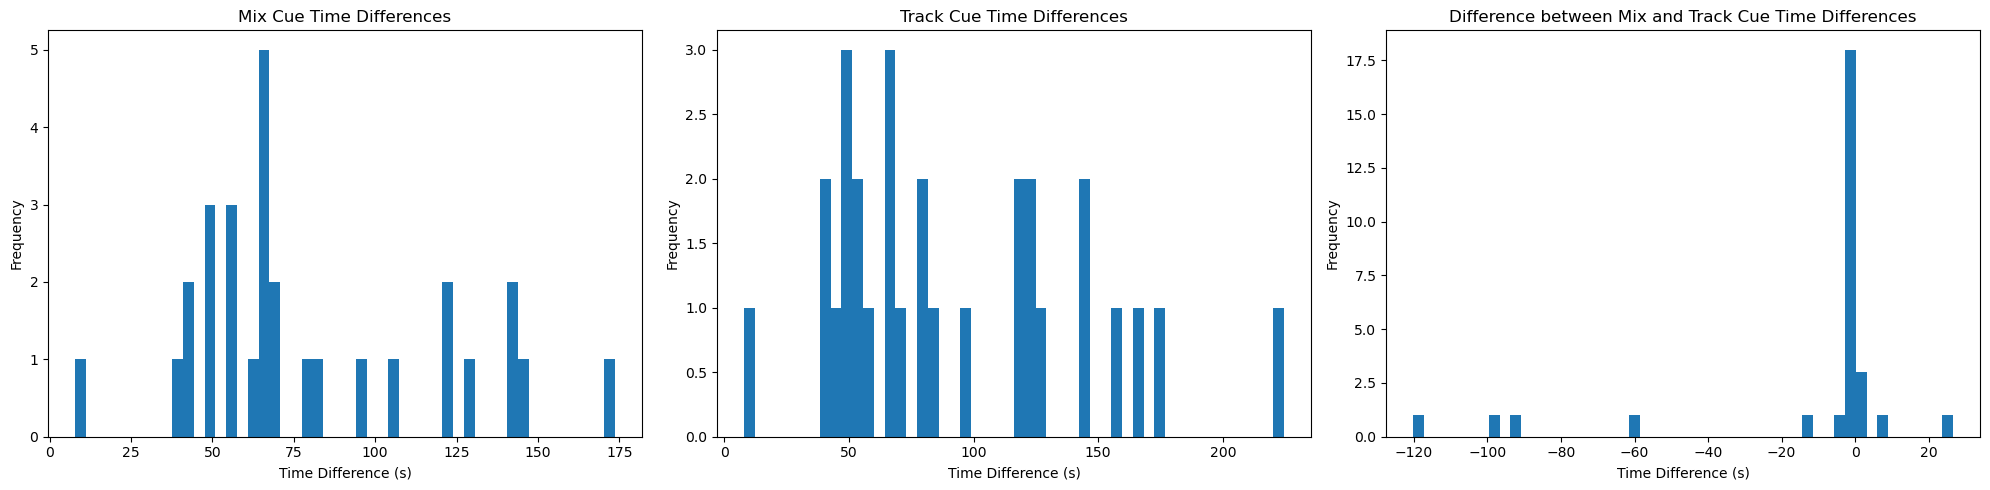

In [109]:
analyze_cue_time_diff(df_chroma_key_inv)

Number of tracks with key changes: 0


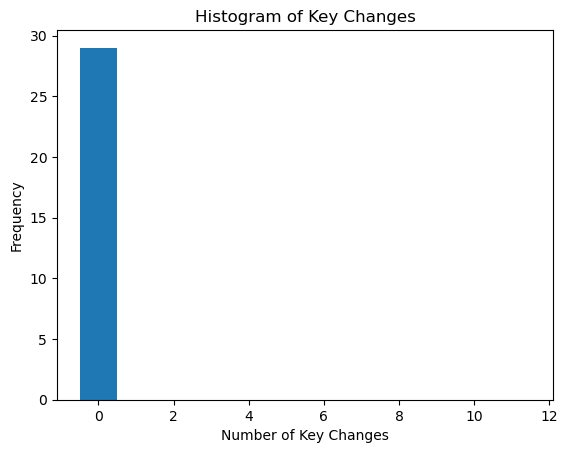

In [110]:
analyze_key_changes(df_chroma_key_inv)

In [111]:
check_cue_time_order(df_chroma_key_inv)

All mix_cue_in_time and mix_cue_out_time are in order.


# Chroma and MFCC Pkl

In [112]:
df_chroma_mfcc = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc.pkl')

In [113]:
df_chroma_mfcc.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,chroma+mfcc,False,0.510949,0,2.401158,[2.4011578310579376],"[[411, 227], [410, 227], [409, 227], [408, 227...",8.46,110.89,0.74,198.36,17,227,1,403
1,jwmtj61,16juffhx,chroma+mfcc,False,0.333333,0,2.673337,[2.6733367988318926],"[[384, 350], [383, 350], [382, 349], [381, 348...",108.99,150.88,14.58,56.30,223,312,31,120


Mix Cue Time Differences:
0    102.43
1     41.89
2     66.80
3     98.16
4     62.92
Name: mix_cue_time_diff, dtype: float64
Mean: 83.2903448275862
Median: 68.06999999999994
Standard Deviation: 42.40689511681178
Min: 9.710000000000036
Max: 170.42000000000007

Track Cue Time Differences:
0    197.62
1     41.72
2     67.03
3     99.37
4     67.46
Name: track_cue_time_diff, dtype: float64
Mean: 104.74344827586206
Median: 81.61
Standard Deviation: 63.47279503151961
Min: 9.84
Max: 266.59

Difference between Mix and Track Cue Time Differences:
0   -95.19
1     0.17
2    -0.23
3    -1.21
4    -4.54
Name: cue_time_diff_diff, dtype: float64
Mean: -21.453103448275865
Median: -0.6399999999999579
Standard Deviation: 41.3526142811041
Min: -119.68000000000029
Max: 7.189999999999998



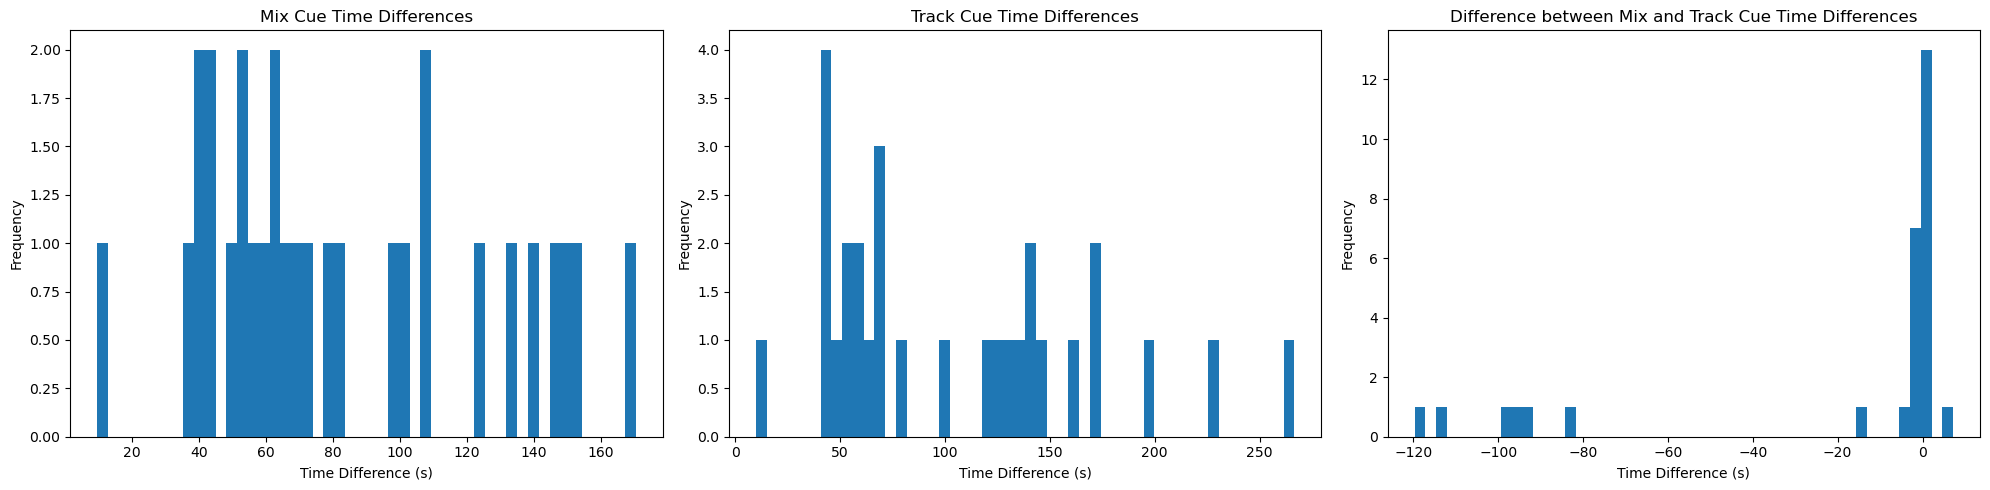

In [114]:
analyze_cue_time_diff(df_chroma_mfcc)

Number of tracks with key changes: 0


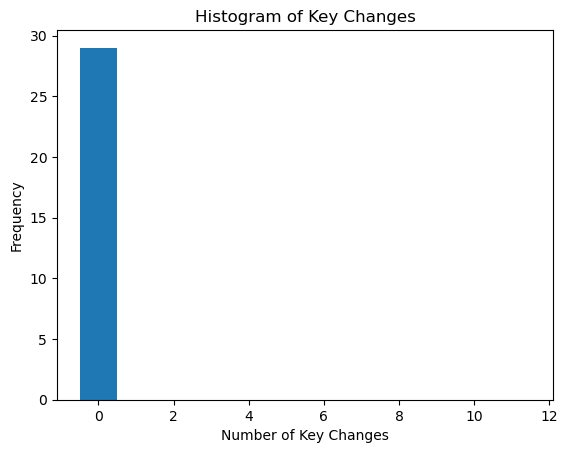

In [116]:
analyze_key_changes(df_chroma_mfcc)

In [119]:
check_cue_time_order(df_chroma_mfcc)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx


# Chroma and MFCC Key Invariant Pkl

In [120]:
df_chroma_mfcc_key_inv = pd.read_pickle('../data/align/jwmtj61-chroma+mfcc-key_invariant.pkl')

In [121]:
df_chroma_mfcc_key_inv.head(2)

,mix_id,track_id,feature,key_invariant,match_rate,key_change,best_cost,costs,wp,mix_cue_in_time,mix_cue_out_time,track_cue_in_time,track_cue_out_time,mix_cue_in_beat,mix_cue_out_beat,track_cue_in_beat,track_cue_out_beat
0,jwmtj61,12t6wktp,chroma+mfcc,True,0.510949,0,2.401158,"[2.4011578310579376, 3.6316766345101397, 3.620...","[[411, 227], [410, 227], [409, 227], [408, 227...",8.46,110.89,0.74,198.36,17,227,1,403
1,jwmtj61,16juffhx,chroma+mfcc,True,0.333333,0,2.673337,"[2.6733367988318926, 3.313664917866619, 3.4233...","[[384, 350], [383, 350], [382, 349], [381, 348...",108.99,150.88,14.58,56.30,223,312,31,120


Mix Cue Time Differences:
0    102.43
1     41.89
2     66.80
3     98.16
4     62.92
Name: mix_cue_time_diff, dtype: float64
Mean: 83.2903448275862
Median: 68.06999999999994
Standard Deviation: 42.40689511681178
Min: 9.710000000000036
Max: 170.42000000000007

Track Cue Time Differences:
0    197.62
1     41.72
2     67.03
3     99.37
4     67.46
Name: track_cue_time_diff, dtype: float64
Mean: 104.74344827586206
Median: 81.61
Standard Deviation: 63.47279503151961
Min: 9.84
Max: 266.59

Difference between Mix and Track Cue Time Differences:
0   -95.19
1     0.17
2    -0.23
3    -1.21
4    -4.54
Name: cue_time_diff_diff, dtype: float64
Mean: -21.453103448275865
Median: -0.6399999999999579
Standard Deviation: 41.3526142811041
Min: -119.68000000000029
Max: 7.189999999999998



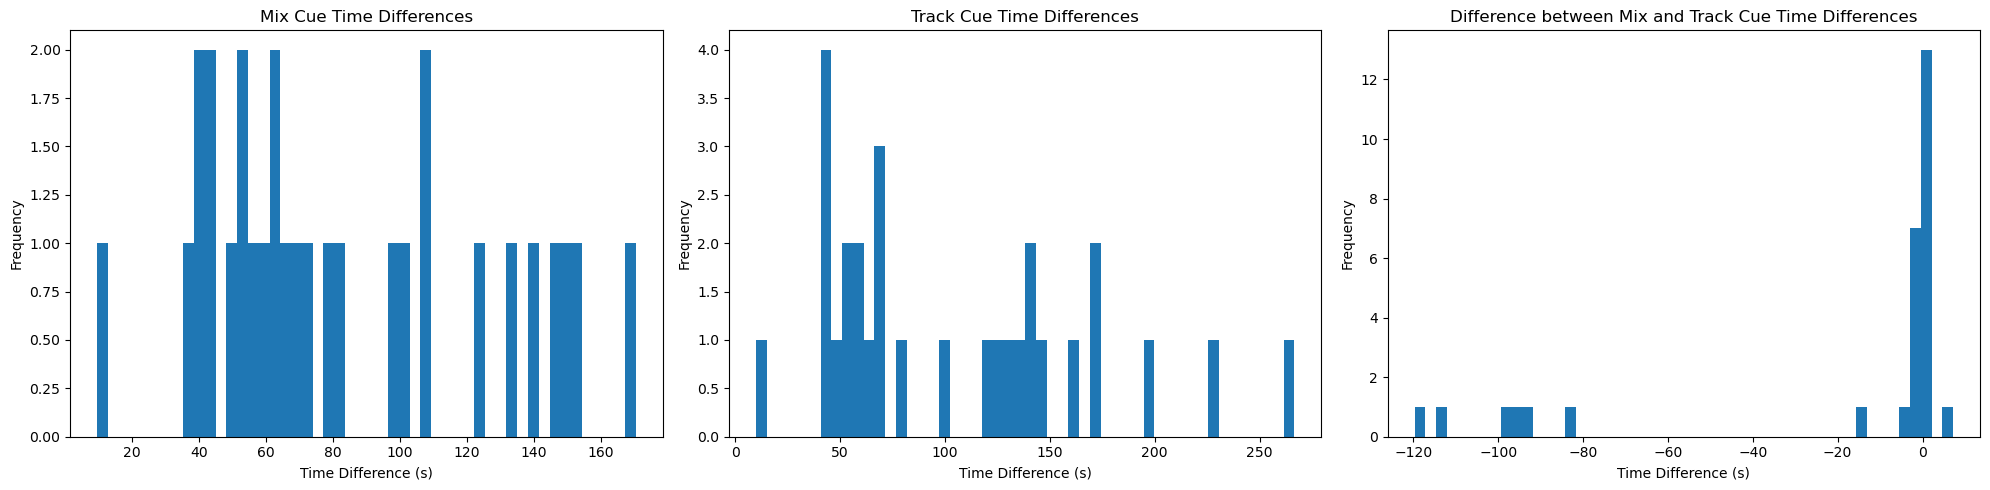

In [123]:
analyze_cue_time_diff(df_chroma_mfcc_key_inv)

Number of tracks with key changes: 0


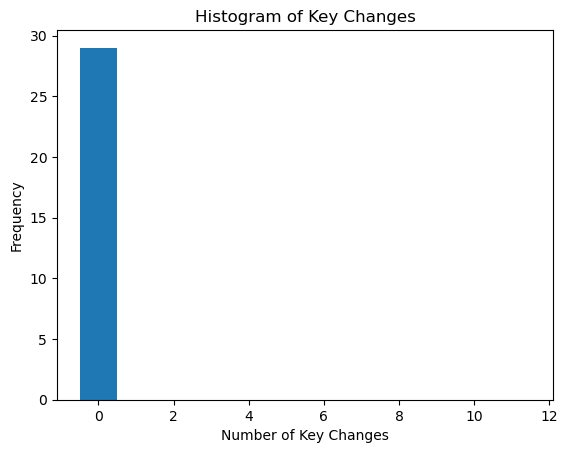

In [124]:
analyze_key_changes(df_chroma_mfcc_key_inv)

In [125]:
check_cue_time_order(df_chroma_mfcc_key_inv)

Error: mix_cue_in_time is not after previous row's mix_cue_out_time for track 16juffhx
